In [5]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
import scipy.stats as stats



# Charger le fichier
file_path = "/Users/pauldakpogan/Downloads/R_AUTO_2021A_transformed.csv"

try:
    df = pd.read_csv(file_path)
    print("Fichier chargé avec succès.")
except Exception as e:
    print(f"Erreur lors du chargement du fichier : {e}")
    raise

# Afficher le nombre de lignes
print(f"Le DataFrame contient {len(df)} lignes.")



Fichier chargé avec succès.
Le DataFrame contient 1172270 lignes.


## Dvision en 64 fichiers

In [ ]:
import os
import pandas as pd

# Chemin d'accès au fichier source
file_path = '/Users/pauldakpogan/Downloads/R_AUTO_2021A.csv'

# Déterminer la taille maximale du fichier en octets (par exemple, 100 Mo)
max_file_size = 100 * 1024 * 1024  # 100 Mo

# Lire le fichier par morceaux et les sauvegarder dans des fichiers plus petits
chunk_iter = pd.read_csv(file_path, sep=';', chunksize=500000, encoding='latin1', low_memory=False)

current_chunk = []
current_size = 0
file_index = 1
output_dir = '/Users/pauldakpogan/Downloads/'

for chunk in chunk_iter:
    current_chunk.append(chunk)
    current_size += chunk.memory_usage(deep=True).sum()

    # Vérifier si la taille actuelle dépasse la taille maximale autorisée
    if current_size >= max_file_size:
        # Sauvegarder le fichier courant
        chunk_file_path = os.path.join(output_dir, f'R_AUTO_2021A_part_{file_index}.csv')
        pd.concat(current_chunk).to_csv(chunk_file_path, index=False, sep=';', encoding='latin1')
        print(f'Fichier {chunk_file_path} sauvegardé avec succès.')
        
        # Réinitialiser les variables pour le prochain fichier
        current_chunk = []
        current_size = 0
        file_index += 1

# Sauvegarder le dernier fichier s'il reste des données
if current_chunk:
    chunk_file_path = os.path.join(output_dir, f'R_AUTO_2021A_part_{file_index}.csv')
    pd.concat(current_chunk).to_csv(chunk_file_path, index=False, sep=';', encoding='latin1')
    print(f'Fichier {chunk_file_path} sauvegardé avec succès.')

## Nettoyage avant fusion

In [ ]:
import os
import pandas as pd

# Dossier contenant les fichiers CSV
dossier_fichiers = "/Users/pauldakpogan/Downloads"

# Colonnes à supprimer
colonnes_a_supprimer = [
    "ENDOSSO", "COD_END", "ITEM", "TIPO_PES", "MODALIDADE", "TIPO_PROD", "COBERTURA",
    "COD_CONT", "TIPO_FRANQ", "VAL_FRANQ", "PERC_FATOR", "TAB_REF", "IS_APP_MA", "IS_APP_IPA",
    "IS_APP_DMH", "PRE_CASCO", "PRE_CAS_CO", "PRE_RCDMAT", "PRE_RCDC", "PRE_RCDMOR",
    "PRE_APP_MA", "PRE_APP_IA", "PRE_APP_DM", "PRE_OUTROS", "FIM_VIG", "PERC_BONUS",
    "CLAS_BONUS", "PERC_CORR", "CEP_UTIL", "CEP_PER", "DATA_EMIS", "SINAL"
]

# Parcourir tous les fichiers du dossier
for fichier in os.listdir(dossier_fichiers):
    if fichier.startswith("R_AUTO_2021A_part_") and fichier.endswith(".csv"):
        chemin_fichier = os.path.join(dossier_fichiers, fichier)
        try:
            # Lecture du fichier avec le bon séparateur
            df = pd.read_csv(chemin_fichier, sep=';', low_memory=False)

            # Suppression des colonnes non nécessaires
            df = df.drop(columns=[col for col in colonnes_a_supprimer if col in df.columns])

            # Sauvegarde du fichier modifié
            nouveau_nom = fichier.replace(".csv", "_cleaned.csv")
            df.to_csv(os.path.join(dossier_fichiers, nouveau_nom), index=False, sep=';')
            print(f"Le fichier {fichier} a été nettoyé et sauvegardé sous {nouveau_nom}.")
        except pd.errors.ParserError as e:
            print(f"Erreur lors de la lecture du fichier {fichier}: {e}")




import pandas as pd

# Chemin vers le fichier nettoyé
chemin_fichier = '/Users/pauldakpogan/Downloads/R_AUTO_2021A_part_1_cleaned.csv'

# Charger les 5 premières lignes du fichier CSV
try:
    df = pd.read_csv(chemin_fichier, sep=';', low_memory=False)
    print(df.head())  # Afficher l'en-tête
    print(df.dtypes)  # Afficher les types de variables
except FileNotFoundError:
    print("Le fichier n'existe pas au chemin indiqué.")
except pd.errors.EmptyDataError:
    print("Le fichier est vide.")
except Exception as e:
    print(f"Une erreur est survenue : {e}")

In [ ]:
import pandas as pd

# Charger le fichier CSV
chemin_fichier = '/Users/pauldakpogan/Downloads/R_AUTO_2021A_part_1_cleaned.csv'
df = pd.read_csv(chemin_fichier, sep=';', low_memory=False)

# Afficher les valeurs manquantes par colonne
print("Valeurs manquantes par colonne:")
print(df.isnull().sum())

# Supprimer les colonnes inutiles
colonnes_a_supprimer = ['cod_apo', 'ITEM', 'ENDOSSO', 'COD_END', 'MODALIDADE', 'TIPO_PROD', 'TAB_REF', 'PERC_FATOR', 'SINAL']
df = df.drop(columns=[col for col in colonnes_a_supprimer if col in df.columns])

# Vérifier les types de données et convertir si nécessaire
df['ANO_MODELO'] = pd.to_numeric(df['ANO_MODELO'], errors='coerce')

# Encodage des variables catégorielles
df = pd.get_dummies(df, columns=['REGIAO', 'SEXO', 'UTILIZACAO'])

# Supprimer les lignes avec trop de valeurs manquantes
df = df.dropna(thresh=len(df.columns) - 2)

# Afficher un résumé du DataFrame nettoyé
print(df.info())
print(df.describe())


In [ ]:
# Charger le fichier CSV
df = pd.read_csv(chemin_fichier, sep=';', low_memory=False)

# 1. Gérer les valeurs négatives dans les colonnes IS_CASCO, IS_RCDMAT, IS_RCDC, IS_RCDMOR
colonnes_a_verifier = ['IS_CASCO', 'IS_RCDMAT', 'IS_RCDC', 'IS_RCDMOR']
for col in colonnes_a_verifier:
    df[col] = df[col].apply(lambda x: x if x >= 0 else None)  # Remplacer les valeurs négatives par None (valeurs manquantes)


In [ ]:
# 2. Corriger les dates de naissance et dates de début de couverture
df['DATA_NASC'] = pd.to_numeric(df['DATA_NASC'], errors='coerce').fillna(0).astype(int)  # Convertir en numérique et remplacer les erreurs par 0
df['DATA_NASC'] = df['DATA_NASC'].apply(lambda x: x if 19000101 <= x <= 20231231 else 0)  # Garder les dates plausibles


In [ ]:
#3 Conversion des dates en format datetime pour faciliter l'analyse
df['INICIO_VIG'] = pd.to_numeric(df['INICIO_VIG'], errors='coerce')
df['INICIO_VIG'] = pd.to_datetime(df['INICIO_VIG'], format='%Y%m%d', errors='coerce')

# 3. Gérer les valeurs aberrantes pour TEMPO_HAB (par exemple, expérience de conduite)
# Supposons que l'expérience de conduite maximale plausible est de 70 ans
df['TEMPO_HAB'] = df['TEMPO_HAB'].apply(lambda x: x if 0 <= x <= 70 else None)



# Résumé du DataFrame nettoyé
print(df.info())
print(df.describe()


# 5. Supprimer les lignes avec DATA_NASC ou TEMPO_HAB égales à 0
df = df[(df['DATA_NASC'] != 0) & (df['TEMPO_HAB'] != 0)]

mport pandas as pd
from datetime import datetime

# Charger le fichier avant le nettoyage complet
chemin_fichier = '/Users/pauldakpogan/Downloads/R_AUTO_2021A_part_1_cleaned.csv'
df = pd.read_csv(chemin_fichier, sep=';', low_memory=False)

# Fonction pour calculer l'âge à partir de la date de naissance en format AAAAMMJJ
def calculer_age(date_aaaammjj):
    try:
        date_naissance = datetime.strptime(str(int(date_aaaammjj)), '%Y%m%d')
        aujourd_hui = datetime.now()
        age = aujourd_hui.year - date_naissance.year - ((aujourd_hui.month, aujourd_hui.day) < (date_naissance.month, date_naissance.day))
        return age
    except ValueError:
        return None  # Retourne None en cas d'erreur de conversion

# Créer une nouvelle colonne "age" dans le DataFrame
df['age'] = df['DATA_NASC'].apply(calculer_age)

# Sauvegarder le DataFrame mis à jour
chemin_fichier_mis_a_jour = '/Users/pauldakpogan/Downloads/R_AUTO_2021A_part_1_with_age.csv'
df.to_csv(chemin_fichier_mis_a_jour, sep=';', index=False)

print("Calcul de l'âge terminé et fichier sauvegardé.")

# Afficher le résumé du DataFrame mis à jour
print(df.info())
print(df.describe())

# Créer une nouvelle colonne "age" dans le DataFrame
df['age'] = df['DATA_NASC'].apply(calculer_age)

# Afficher la colonne DATA_NASC et la nouvelle colonne "age"
#print(df[['DATA_NASC', 'age']])

# Visualiser les colonnes où il y a des valeurs manquantes dans la colonne 'age'
#missing_age = df[df['age'].isna()]

# Afficher les lignes où 'age' est manquant
print(missing_age)

## Boxplot de l'age

In [ ]:
# Afficher des box plots pour visualiser la répartition de la variable "age"
plt.figure(figsize=(10, 6))
df['age'].plot(kind='box')
plt.title('Box Plot de la variable "age"')
plt.ylabel('Âge')
plt.grid(axis='y', linestyle='--')
plt.show()



In [ ]:
# Afficher toutes les lignes où l'âge est supérieur à 100 ans
ages_sup_100 = df[df['age'] > 100]
print(ages_sup_100)

## Fusion des 64 fichiers nettoyés

In [ ]:
import pandas as pd
import glob

# Define the path pattern for all files to clean
file_paths = glob.glob('/Users/pauldakpogan/Downloads/R_AUTO_2021A_part_*_cleaned.csv')

# Function to clean each file
remaining_rows_needed = 3000000
processed_files = 0

def clean_file(file_path, rows_needed):
    global remaining_rows_needed
    global processed_files

    # Load the CSV file
    df = pd.read_csv(file_path, sep=';', low_memory=False)

    # Step 1: Convert 'DATA_NASC' column to datetime format (day, month, year)
    df['DATA_NASC'] = pd.to_datetime(df['DATA_NASC'], format='%Y%m%d', errors='coerce')

    # Step 2: Create 'AGE' column
    current_year = pd.Timestamp.now().year
    df['AGE'] = current_year - df['DATA_NASC'].dt.year

    # Step 3: Drop rows with missing 'AGE' or 'DATA_NASC'
    df_cleaned = df.dropna(subset=['AGE', 'DATA_NASC'])

    # Step 4: Remove rows with negative values for relevant columns
    columns_to_check = ['IS_CASCO', 'IS_RCDMAT', 'IS_RCDC', 'IS_RCDMOR']
    df_cleaned = df_cleaned[(df_cleaned['IS_CASCO'] >= 0) &
                            (df_cleaned['IS_RCDMAT'] >= 0) &
                            (df_cleaned['IS_RCDC'] >= 0) &
                            (df_cleaned['IS_RCDMOR'] >= 0)]

    # Step 5: Remove rows where 'AGE' is greater than 124
    df_cleaned = df_cleaned[df_cleaned['AGE'] <= 124]

    # Step 6: Adjust data types for relevant columns
    df_cleaned['cod_apo'] = df_cleaned['cod_apo'].astype('int64')
    df_cleaned['COD_MODELO'] = df_cleaned['COD_MODELO'].astype('object')
    df_cleaned['ANO_MODELO'] = df_cleaned['ANO_MODELO'].astype('int64')
    df_cleaned['COD_TARIF'] = df_cleaned['COD_TARIF'].astype('object')
    df_cleaned['REGIAO'] = df_cleaned['REGIAO'].astype('object')
    df_cleaned['IS_CASCO'] = df_cleaned['IS_CASCO'].astype('float64')
    df_cleaned['IS_RCDMAT'] = df_cleaned['IS_RCDMAT'].astype('float64')
    df_cleaned['IS_RCDC'] = df_cleaned['IS_RCDC'].astype('float64')
    df_cleaned['IS_RCDMOR'] = df_cleaned['IS_RCDMOR'].astype('float64')
    
    # Step 6 (adjustment): Correct 'INICIO_VIG' by parsing it properly if needed and then converting to int
    df_cleaned['INICIO_VIG'] = pd.to_datetime(df_cleaned['INICIO_VIG'], errors='coerce', format='%Y%m%d')
    df_cleaned = df_cleaned.dropna(subset=['INICIO_VIG'])  # Drop rows with NaN in 'INICIO_VIG'
    df_cleaned['INICIO_VIG'] = df_cleaned['INICIO_VIG'].dt.strftime('%Y%m%d').astype('int64')
    
    df_cleaned['SEXO'] = df_cleaned['SEXO'].astype('object')
    df_cleaned['DATA_NASC'] = df_cleaned['DATA_NASC'].astype('datetime64[ns]')
    df_cleaned['TEMPO_HAB'] = df_cleaned['TEMPO_HAB'].astype('int64')
    df_cleaned['UTILIZACAO'] = df_cleaned['UTILIZACAO'].astype('int64')
    df_cleaned['AGE'] = df_cleaned['AGE'].astype('int64')

    # Step 7: Adjust number of rows to ensure 50000 rows for each file
    rows_to_take = min(len(df_cleaned), rows_needed // (67 - processed_files))
    df_cleaned = df_cleaned.head(rows_to_take)
    
    remaining_rows_needed -= len(df_cleaned)
    processed_files += 1

    # Save the cleaned dataframe to a new CSV file
    output_file_path = file_path.replace('part_', 'cleaned_part_')
    df_cleaned.to_csv(output_file_path, index=False, sep=';')
    return df_cleaned

# Iterate over all files, clean them, and append to the final dataframe
all_dataframes = []
for file_path in file_paths:
    cleaned_df = clean_file(file_path, remaining_rows_needed)
    if cleaned_df is not None:
        all_dataframes.append(cleaned_df)

# Concatenate all cleaned dataframes into one final dataframe
if all_dataframes:
    final_dataframe = pd.concat(all_dataframes, ignore_index=True)

    # Save the final concatenated dataframe to a new CSV file
    final_output_path = '/Users/pauldakpogan/Downloads/R_AUTO_2021A_final_cleaned.csv'
    final_dataframe.to_csv(final_output_path, index=False, sep=';')
    


In [ ]:
import pandas as pd
import glob

# Définir le chemin pour tous les fichiers à nettoyer
file_paths = glob.glob('/Users/pauldakpogan/Downloads/R_AUTO_2021A_part_*_cleaned.csv')

# Fonction pour nettoyer chaque fichier
def clean_file(file_path):
    # Charger le fichier CSV
    df = pd.read_csv(file_path, sep=';', low_memory=False)

    # Étape 1: Convertir la colonne 'DATA_NASC' au format datetime (jour, mois, année)
    df['DATA_NASC'] = pd.to_datetime(df['DATA_NASC'], format='%Y%m%d', errors='coerce')

    # Étape 2: Créer la colonne 'AGE'
    current_year = pd.Timestamp.now().year
    df['AGE'] = current_year - df['DATA_NASC'].dt.year

    # Étape 3: Supprimer les lignes avec 'AGE' ou 'DATA_NASC' manquants
    df_cleaned = df.dropna(subset=['AGE', 'DATA_NASC'])

    # Étape 4: Supprimer les lignes avec des valeurs négatives dans les colonnes pertinentes
    columns_to_check = ['IS_CASCO', 'IS_RCDMAT', 'IS_RCDC', 'IS_RCDMOR']
    df_cleaned = df_cleaned[(df_cleaned['IS_CASCO'] >= 0) &
                            (df_cleaned['IS_RCDMAT'] >= 0) &
                            (df_cleaned['IS_RCDC'] >= 0) &
                            (df_cleaned['IS_RCDMOR'] >= 0)]

    # Étape 5: Supprimer les lignes où l'âge est supérieur à 124
    df_cleaned = df_cleaned[df_cleaned['AGE'] <= 124]

    # Étape 6: Ajuster les types de données pour les colonnes pertinentes
    df_cleaned['cod_apo'] = df_cleaned['cod_apo'].astype('int64')
    df_cleaned['COD_MODELO'] = df_cleaned['COD_MODELO'].astype('object')
    df_cleaned['ANO_MODELO'] = df_cleaned['ANO_MODELO'].astype('int64')
    df_cleaned['COD_TARIF'] = df_cleaned['COD_TARIF'].astype('object')
    df_cleaned['REGIAO'] = df_cleaned['REGIAO'].astype('object')
    df_cleaned['IS_CASCO'] = df_cleaned['IS_CASCO'].astype('float64')
    df_cleaned['IS_RCDMAT'] = df_cleaned['IS_RCDMAT'].astype('float64')
    df_cleaned['IS_RCDC'] = df_cleaned['IS_RCDC'].astype('float64')
    df_cleaned['IS_RCDMOR'] = df_cleaned['IS_RCDMOR'].astype('float64')

    # Étape 7: Corriger la colonne 'INICIO_VIG' en la convertissant au bon format
    df_cleaned['INICIO_VIG'] = pd.to_datetime(df_cleaned['INICIO_VIG'], errors='coerce', format='%Y%m%d')
    df_cleaned = df_cleaned.dropna(subset=['INICIO_VIG'])  # Supprimer les lignes avec NaN dans 'INICIO_VIG'
    df_cleaned['INICIO_VIG'] = df_cleaned['INICIO_VIG'].dt.strftime('%Y%m%d').astype('int64')

    df_cleaned['SEXO'] = df_cleaned['SEXO'].astype('object')
    df_cleaned['DATA_NASC'] = df_cleaned['DATA_NASC'].astype('datetime64[ns]')
    df_cleaned['TEMPO_HAB'] = df_cleaned['TEMPO_HAB'].astype('int64')
    df_cleaned['UTILIZACAO'] = df_cleaned['UTILIZACAO'].astype('int64')
    df_cleaned['AGE'] = df_cleaned['AGE'].astype('int64')

    # Sauvegarder le DataFrame nettoyé dans un nouveau fichier CSV
    output_file_path = file_path.replace('part_', 'cleaned_part_')
    df_cleaned.to_csv(output_file_path, index=False, sep=';')
    return df_cleaned

# Itérer sur tous les fichiers, les nettoyer, et les ajouter à la liste des DataFrames finaux
all_dataframes = []
for file_path in file_paths:
    cleaned_df = clean_file(file_path)
    if cleaned_df is not None:
        all_dataframes.append(cleaned_df)

# Concatenation de tous les DataFrames nettoyés en un seul DataFrame final
if all_dataframes:
    final_dataframe = pd.concat(all_dataframes, ignore_index=True)

    # Enregistrer le DataFrame final concatené dans un nouveau fichier CSV
    final_output_path = '/Users/pauldakpogan/Downloads/R_AUTO_2021A_final_cleaned.csv'
    final_dataframe.to_csv(final_output_path, index=False, sep=';')

    # Afficher le nombre de lignes après la concatenation
    print(f"Nombre de lignes dans le DataFrame final : {len(final_dataframe)}")


In [ ]:
import pandas as pd

# Charger les DataFrames
final_output_path = '/Users/pauldakpogan/Downloads/R_AUTO_2021A_final_cleaned.csv'
data_output_path = '/Users/pauldakpogan/Downloads/data_output5.csv'

# Charger le fichier CSV final_dataframe
final_dataframe = pd.read_csv(final_output_path, sep=';', low_memory=False)

# Charger le fichier data_output5.csv
data_output_df = pd.read_csv(data_output_path, sep=',', low_memory=False)

# Étape 1 : Vérifier et uniformiser les types de données
# Assurez-vous que 'cod_apo' est de type float dans les deux DataFrames
final_dataframe['cod_apo'] = final_dataframe['cod_apo'].astype(float)
data_output_df['cod_apo'] = data_output_df['cod_apo'].astype(float)

# Étape 2 : Supprimer les valeurs manquantes dans la colonne 'cod_apo'
final_dataframe = final_dataframe.dropna(subset=['cod_apo'])
data_output_df = data_output_df.dropna(subset=['cod_apo'])

# Étape 3 : Effectuer une jointure interne pour éliminer les valeurs manquantes
# La jointure interne conservera uniquement les lignes pour lesquelles 'cod_apo' est présent dans les deux DataFrames
merged_df = pd.merge(final_dataframe, data_output_df, how='inner', on='cod_apo')

# Aperçu du DataFrame fusionné
print("Aperçu du DataFrame fusionné :")
print(merged_df.head())

# Enregistrer le DataFrame fusionné sans valeurs manquantes
merged_output_path = '/Users/pauldakpogan/Downloads/R_AUTO_2021A_merged_final_inner.csv'
merged_df.to_csv(merged_output_path, index=False, sep=';')

# Afficher le nombre de lignes après la fusion
print(f"Nombre de lignes dans le DataFrame fusionné : {len(merged_df)}")


In [ ]:
import pandas as pd

# Chemins des fichiers d'origine
final_dataframe_path = '/Users/pauldakpogan/Downloads/R_AUTO_2021A_final_cleaned.csv'
data_output_path = '/Users/pauldakpogan/Downloads/data_output5.csv'

# Charger les fichiers
final_dataframe = pd.read_csv(final_dataframe_path, sep=';', low_memory=False)
data_output_df = pd.read_csv(data_output_path, sep=',', low_memory=False)

# Vérifier la présence de doublons dans chaque DataFrame initial pour 'cod_apo'
final_duplicates = final_dataframe.duplicated(subset='cod_apo', keep=False)
output_duplicates = data_output_df.duplicated(subset='cod_apo', keep=False)

# Extraire les lignes dupliquées pour chaque DataFrame
final_dataframe_duplicates = final_dataframe[final_duplicates]
data_output_df_duplicates = data_output_df[output_duplicates]

# Afficher un aperçu des doublons trouvés
print("Doublons dans le DataFrame 'final_dataframe' :")
print(final_dataframe_duplicates.head())

print("\nNombre de doublons dans 'final_dataframe' :", len(final_dataframe_duplicates))

print("\nDoublons dans le DataFrame 'data_output_df' :")
print(data_output_df_duplicates.head())

print("\nNombre de doublons dans 'data_output_df' :", len(data_output_df_duplicates))

# Enregistrer les doublons dans des fichiers CSV pour analyse
final_dataframe_duplicates.to_csv('/Users/pauldakpogan/Downloads/final_dataframe_duplicates.csv', index=False, sep=';')
data_output_df_duplicates.to_csv('/Users/pauldakpogan/Downloads/data_output_duplicates.csv', index=False, sep=';')


In [ ]:
# Afficher les modalités de la variable 'COD_MODELO' et leur fréquence
modalites_cod_modelo = df['COD_MODELO'].value_counts()

# Afficher le résultat
print(modalites_cod_modelo)

# Si vous souhaitez également obtenir le nombre total de modalités uniques :
nombre_modalites = df['COD_MODELO'].nunique()
print(f"\nNombre total de modalités uniques pour COD_MODELO : {nombre_modalites}")

In [ ]:
import pandas as pd

# Load the CSV file
file_path = '/Users/pauldakpogan/Downloads/R_AUTO_2021A_merged_final_inner.csv'
df = pd.read_csv(file_path, sep=';', low_memory=False)# Remove rows where 'COD_MODELO_x' is '999999-9'
df_filtered = df[df['COD_MODELO_x'] != '999999-9']

# Trier par 'cod_apo' pour voir les lignes regroupées visuellement
df_sorted = df_filtered.sort_values(by='cod_apo').reset_index(drop=True)

print("\nDataFrame après regroupement visuel par 'cod_apo' :")
print(df_sorted)

# Save the filtered and aggregated dataframe to a new CSV file
output_file_path = '/Users/pauldakpogan/Downloads/R_AUTO_2021A_merged_final_filtered_sorted.csv'
df_sorted.to_csv(output_file_path, index=False, sep=';')

# Display the number of rows in the filtered dataframe
print(f"Number of rows after filtering and sort: {len(df_sorted)}")
print(df_sorted.head())


In [ ]:
import pandas as pd

# Charger le fichier CSV
file_path = '/Users/pauldakpogan/Downloads/R_AUTO_2021A_merged_final_filtered_sorted.csv'
df = pd.read_csv(file_path, sep=';', low_memory=False)

# Afficher les modalités uniques de la colonne 'codeTarif'
unique_modalities = df['codeTarif'].unique()

# Afficher les modalités uniques
print("Modalités uniques pour la colonne 'codeTarif' :")
for modality in unique_modalities:
    print(modality)


In [ ]:

import pandas as pd

# Load the CSV file
file_path = '/Users/pauldakpogan/Downloads/R_AUTO_2021A_merged_final_filtered_sorted.csv'
df = pd.read_csv(file_path, sep=';', low_memory=False)

# Remove duplicate rows based on 'cod_apo' and keep the first occurrence
df_unique = df.drop_duplicates(subset='cod_apo', keep='first')

# Save the updated dataframe to a new CSV file
output_file_path = '/Users/pauldakpogan/Downloads/R_AUTO_2021A_merged_final_filtered_unique.csv'
df_unique.to_csv(output_file_path, index=False, sep=';')

# Display the number of rows after removing duplicates
print(f"Number of rows after removing duplicates: {len(df_unique)}")

In [ ]:
import pandas as pd

# Charger le fichier CSV
file_path = '/Users/pauldakpogan/Downloads/R_AUTO_2021A_merged_final_filtered_unique.csv'
df = pd.read_csv(file_path, sep=';', low_memory=False)

# Afficher les modalités uniques de la colonne 'codeTarif'
unique_modalities = df['codeTarif'].unique()

# Afficher les modalités uniques
print("Modalités uniques pour la colonne 'codeTarif' :")
for modality in unique_modalities:
    print(modality)

In [ ]:
# Remove rows where 'codeTarif' is NaN
rows_before = len(df_unique)
df_unique = df_unique.dropna(subset=['codeTarif'])
rows_after = len(df_unique)

# Calculate the number of rows removed
rows_removed = rows_before - rows_after

# Save the resulting DataFrame to a new CSV file
output_file_path = '/Users/pauldakpogan/Downloads/R_AUTO_2021A_merged_final_filtered_no_duplicates_no_nan.csv'
df_unique.to_csv(output_file_path, index=False, sep=';')

# Display the number of rows removed and the number of rows in the resulting DataFrame
print(f"Number of rows removed due to NaN in 'codeTarif': {rows_removed}")
print(f"Number of rows after removing duplicates and NaN: {len(df_unique)}")


In [ ]:
import pandas as pd

# Load the final cleaned CSV file to check the number of rows
final_output_path = '/Users/pauldakpogan/Downloads/R_AUTO_2021A_final_cleaned.csv'
final_dataframe = pd.read_csv(final_output_path, sep=';', low_memory=False)

# Display the number of rows in the final dataframe
print(f"Number of rows in the final dataframe: {len(final_dataframe)}")


In [ ]:
import pandas as pd
import glob
import os

# Load the new file to be analyzed
data_output_path = '/Users/pauldakpogan/Downloads/data_output5.csv'
if os.path.exists(data_output_path):
    data_output_df = pd.read_csv(data_output_path, sep=';', low_memory=False)

    # Display the header and number of rows of the new file
    print("Header of data_output5.csv:")
    print(data_output_df.head())
    print(f"Number of rows in data_output5.csv: {len(data_output_df)}")

# Generate an overview of the final_dataframe and data_output_df
if 'final_dataframe' in locals():
    print("Overview of final_dataframe (first 5 rows):")
    print(final_dataframe.head())
    print(final_dataframe.describe())

if 'data_output_df' in locals():
    print("Overview of data_output_df (first 5 rows):")
    print(data_output_df.head())
    print(data_output_df.describe())

In [ ]:
import pandas as pd

# Charger les DataFrames
final_output_path = '/Users/pauldakpogan/Downloads/R_AUTO_2021A_final_cleaned.csv'
data_output_path = '/Users/pauldakpogan/Downloads/data_output5.csv'

# Charger les fichiers CSV
final_dataframe = pd.read_csv(final_output_path, sep=';', low_memory=False)
data_output_df = pd.read_csv(data_output_path, sep=',', low_memory=False)

# Étape 1 : Vérifier et uniformiser les types de données
# Assurez-vous que 'cod_apo' est de type float dans les deux DataFrames
final_dataframe['cod_apo'] = final_dataframe['cod_apo'].astype(float)
data_output_df['cod_apo'] = data_output_df['cod_apo'].astype(float)

# Étape 2 : Supprimer les valeurs manquantes dans la colonne 'cod_apo'
final_dataframe = final_dataframe.dropna(subset=['cod_apo'])
data_output_df = data_output_df.dropna(subset=['cod_apo'])

# Étape 3 : Effectuer une jointure interne pour éliminer les valeurs manquantes
# La jointure interne conservera uniquement les lignes pour lesquelles 'cod_apo' est présent dans les deux DataFrames
merged_df = pd.merge(final_dataframe, data_output_df, how='inner', on='cod_apo')

# Aperçu du DataFrame fusionné
print("Aperçu du DataFrame fusionné :")
print(merged_df.head())

# Enregistrer le DataFrame fusionné sans valeurs manquantes
merged_output_path = '/Users/pauldakpogan/Downloads/R_AUTO_2021A_merged_final_inner.csv'
merged_df.to_csv(merged_output_path, index=False, sep=';')

# Afficher le nombre de lignes après la fusion
print(f"Nombre de lignes dans le DataFrame fusionné : {len(merged_df)}")


In [6]:

# Charger le fichier initial sans doublons
file_path = "/Users/pauldakpogan/Downloads/R_AUTO_2021A_merged_final_no_duplicates.csv"

try:
    df = pd.read_csv(file_path, sep=';', low_memory=False)
    print("Fichier chargé avec succès.")
except Exception as e:
    print(f"Erreur lors du chargement du fichier : {e}")
    raise

# Convertir la colonne D_OCORR en datetime
try:
    df['D_OCORR'] = pd.to_datetime(df['D_OCORR'], format='%Y%m%d', errors='coerce')
    print("Conversion de D_OCORR en datetime réussie.")
except Exception as e:
    print(f"Erreur lors de la conversion de D_OCORR : {e}")
    raise

# Extraire l'année de D_OCORR
try:
    df['Year'] = df['D_OCORR'].dt.year
except Exception as e:
    print(f"Erreur lors de l'extraction de l'année : {e}")
    raise

# Compter le nombre de lignes par année
line_counts_by_year = df['Year'].value_counts().sort_index()

# Afficher les résultats
print("Nombre de lignes par année dans D_OCORR :")
print(line_counts_by_year)

# Si nécessaire, enregistrer les résultats dans un fichier CSV
output_file = "/Users/pauldakpogan/Downloads/line_counts_by_year.csv"
line_counts_by_year.to_csv(output_file, header=["Count"], index_label="Year")
print(f"Résultats enregistrés dans : {output_file}")





Fichier chargé avec succès.
Conversion de D_OCORR en datetime réussie.
Nombre de lignes par année dans D_OCORR :
Year
2014          1
2018          1
2019        623
2020    1171645
Name: count, dtype: int64
Résultats enregistrés dans : /Users/pauldakpogan/Downloads/line_counts_by_year.csv


In [7]:

# Charger le fichier initial
file_path = "/Users/pauldakpogan/Downloads/R_AUTO_2021A_merged_final_no_duplicates.csv"
try:
    df = pd.read_csv(file_path, sep=';', low_memory=False)
    print("Fichier chargé avec succès.")
except Exception as e:
    print(f"Erreur lors du chargement du fichier : {e}")
    raise

# Convertir la colonne D_OCORR en datetime
df['D_OCORR'] = pd.to_datetime(df['D_OCORR'], format='%Y%m%d', errors='coerce')

# Extraire l'année
df['Year'] = df['D_OCORR'].dt.year

# Filtrer les données pour 2019 et 2020
df_2019 = df[df['Year'] == 2019]
df_2020 = df[df['Year'] == 2020]

# Nombre total de lignes à sélectionner
target_total = 1000000
remaining_lines = target_total - len(df_2019)

# Échantillonner les lignes de 2020
if remaining_lines > 0:
    df_2020_sample = df_2020.sample(n=remaining_lines, random_state=42)
else:
    print("Le nombre total de lignes est inférieur à 800 600. Toutes les lignes de 2019 seront incluses.")

# Combiner les données de 2019 et l'échantillon de 2020
df_final = pd.concat([df_2019, df_2020_sample])

# Vérifier le résultat
print(f"Nombre total de lignes sélectionnées : {len(df_final)}")
print(f"Lignes par année :\n{df_final['Year'].value_counts()}")

# Sauvegarder les données finales
output_file = "/Users/pauldakpogan/Downloads/R_AUTO_2021A_sampled.csv"
df_final.to_csv(output_file, index=False, sep=';')
print(f"Fichier échantillonné enregistré avec succès à : {output_file}")


Fichier chargé avec succès.
Nombre total de lignes sélectionnées : 1000000
Lignes par année :
Year
2020    999377
2019       623
Name: count, dtype: int64
Fichier échantillonné enregistré avec succès à : /Users/pauldakpogan/Downloads/R_AUTO_2021A_sampled.csv


In [8]:

# Colonnes à conserver



# Chemin du fichier échantillonné
sampled_file_path = "/Users/pauldakpogan/Downloads/R_AUTO_2021A_sampled.csv"
output_file_path = "/Users/pauldakpogan/Downloads/R_AUTO_2021A_filtered_sampled.csv"

# Charger le fichier échantillonné
try:
    df_sampled = pd.read_csv(sampled_file_path, sep=';', on_bad_lines='skip', low_memory=False)
    print("Fichier échantillonné chargé avec succès.")
except Exception as e:
    print(f"Erreur lors du chargement du fichier : {e}")
    raise

# Colonnes à conserver
columns_to_keep = [
    "number_of_claims", "COD_MODELO_x", "ANO_MODELO_x", "COD_TARIF_x", 
    "REGIAO_x", "IS_CASCO", "IS_RCDMAT", "IS_RCDC", "IS_RCDMOR", 
    "INICIO_VIG", "SEXO_x", "AGE_x", "TEMPO_HAB", "UTILIZACAO", "D_OCORR"
]

# Vérifier que les colonnes existent dans le DataFrame
missing_columns = [col for col in columns_to_keep if col not in df_sampled.columns]
if missing_columns:
    print(f"Les colonnes suivantes sont manquantes dans le fichier : {missing_columns}")
    raise ValueError("Colonnes manquantes dans le DataFrame.")

# Filtrer les colonnes
filtered_df = df_sampled[columns_to_keep]

# Vérifier les informations du DataFrame filtré
print("Colonnes conservées :")
print(filtered_df.columns)

# Sauvegarder le fichier filtré
try:
    filtered_df.to_csv(output_file_path, sep=';', index=False)
    print(f"Fichier filtré enregistré avec succès à : {output_file_path}")
except Exception as e:
    print(f"Erreur lors de l'enregistrement du fichier : {e}")
    raise


Fichier échantillonné chargé avec succès.
Colonnes conservées :
Index(['number_of_claims', 'COD_MODELO_x', 'ANO_MODELO_x', 'COD_TARIF_x',
       'REGIAO_x', 'IS_CASCO', 'IS_RCDMAT', 'IS_RCDC', 'IS_RCDMOR',
       'INICIO_VIG', 'SEXO_x', 'AGE_x', 'TEMPO_HAB', 'UTILIZACAO', 'D_OCORR'],
      dtype='object')
Fichier filtré enregistré avec succès à : /Users/pauldakpogan/Downloads/R_AUTO_2021A_filtered_sampled.csv


In [9]:


# Chemin des fichiers
file_path = "/Users/pauldakpogan/Downloads/R_AUTO_2021A_filtered_sampled.csv"
output_file_path = "/Users/pauldakpogan/Downloads/R_AUTO_2021A_transformed_filtered_sampled.csv"
output_model_summary = "/Users/pauldakpogan/Documents/model_summary.txt"

def load_and_clean_data(file_path, output_file_path):
    # Lecture du fichier CSV avec le bon séparateur
    try:
        df = pd.read_csv(file_path, sep=';', low_memory=False)
        print("Fichier chargé avec succès.")
    except Exception as e:
        print(f"Erreur lors du chargement du fichier : {e}")
        return None

    # Vérifier si les colonnes sont correctement séparées
    if len(df.columns) == 1:
        print("Attention : toutes les données sont dans une seule colonne. Vérifiez le séparateur.")
        raise ValueError("Le fichier semble mal formaté, vérifiez le séparateur ou le fichier source.")

    # Définir les types de colonnes
    column_types = {
        'COD_MODELO_x': 'category',
        'COD_TARIF_x': 'category',
        'SEXO_x': 'category',
        'INICIO_VIG': 'datetime64[ns]',
        'D_OCORR': 'datetime64[ns]'
    }

    # Appliquer les types définis
    for col, col_type in column_types.items():
        if col in df.columns:
            if col_type == 'category':
                df[col] = df[col].astype(col_type)
            elif col_type == 'datetime64[ns]':
                df[col] = pd.to_datetime(df[col], errors='coerce')
        else:
            print(f"Attention : La colonne '{col}' n'existe pas dans le DataFrame.")

    # Traitement des valeurs aberrantes : élimination des valeurs au-dessus du 99.9ᵉ centile
    if 'number_of_claims' in df.columns:
        threshold = df['number_of_claims'].quantile(0.999)
        rows_before = len(df)
        df = df[df['number_of_claims'] <= threshold]
        rows_after = len(df)
        print(f"Données filtrées pour exclure les valeurs aberrantes au-dessus du 99.5ᵉ centile ({threshold}).")
        print(f"Nombre de lignes avant filtrage : {rows_before}")
        print(f"Nombre de lignes après filtrage : {rows_after}")
        print(f"Nombre de lignes supprimées : {rows_before - rows_after}")

    # Suppression des colonnes inutiles
    columns_to_drop = ['INICIO_VIG', 'D_OCORR']
    df.drop(columns=columns_to_drop, errors='ignore', inplace=True)
    print("Colonnes temporelles inutiles supprimées.")


In [10]:
# File path
file_path = r"/Users/pauldakpogan/Downloads/R_AUTO_2021A_transformed_filtered_sampled.csv"
df = pd.read_csv(file_path, sep=';', on_bad_lines='skip', encoding='ISO-8859-1')

In [11]:
df

,number_of_claims,COD_MODELO_x,ANO_MODELO_x,COD_TARIF_x,REGIAO_x,IS_CASCO,IS_RCDMAT,IS_RCDC,IS_RCDMOR,SEXO_x,AGE_x,TEMPO_HAB,UTILIZACAO
0,1,847,2012,6,1,34526.0,300000.0,300000.0,40000.0,2,62,463,2
1,2,1336,2013,6,8,34119.0,200000.0,200000.0,5000.0,2,33,129,2
2,1,2452,2010,6,23,29402.0,50000.0,50000.0,10000.0,1,59,0,2
3,2,1824,2016,6,1,39552.0,150000.0,100000.0,0.0,1,60,0,2
4,1,75,2009,15,12,43261.0,50000.0,50000.0,0.0,2,61,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
998996,1,1210,2005,6,11,16478.0,50000.0,50000.0,0.0,2,78,0,2
998997,1,1864,2019,6,13,66693.0,100000.0,100000.0,5000.0,2,39,0,1
998998,1,1109,2001,17,8,34167.0,100000.0,150000.0,0.0,2,65,0,2
998999,1,1843,2016,6,5,32723.0,100000.0,100000.0,10000.0,1,48,0,1


## Division par classe d'âge et d'ancienneté de vehicule

In [12]:
import pandas as pd

# Charger vos données (supposons qu'elles sont déjà dans un DataFrame appelé df)

# Classer les âges par tranche de 5 ans
df['AGE_Group'] = pd.cut(df['AGE_x'], bins=range(0, df['AGE_x'].max() + 5, 5), right=False)

# Classer les années de modèle de voiture par tranche de 3 ans
min_year = df['ANO_MODELO_x'].min()
max_year = df['ANO_MODELO_x'].max()
df['ANO_MODELO_Class'] = pd.cut(df['ANO_MODELO_x'], bins=range(min_year, max_year + 3, 3), right=False)

# Afficher les premières lignes pour vérifier
print(df[['AGE_x', 'AGE_Group', 'ANO_MODELO_x', 'ANO_MODELO_Class']].head())


   AGE_x AGE_Group  ANO_MODELO_x ANO_MODELO_Class
0     62  [60, 65)          2012     [2011, 2014)
1     33  [30, 35)          2013     [2011, 2014)
2     59  [55, 60)          2010     [2008, 2011)
3     60  [60, 65)          2016     [2014, 2017)
4     61  [60, 65)          2009     [2008, 2011)


## Traitement des valeurs manquantes

In [13]:
# Vérifier si des valeurs manquantes existent dans le DataFrame
missing_values_summary = df.isnull().sum()

# Filtrer pour afficher uniquement les colonnes avec des valeurs manquantes
missing_columns = missing_values_summary[missing_values_summary > 0]

missing_columns

AGE_Group    10
dtype: int64

In [14]:
# Supprimer les lignes contenant des valeurs manquantes dans AGE_Group 
df = df.dropna(subset=['AGE_Group'])

# Vérifier à nouveau les valeurs manquantes pour confirmer
missing_values_summary_after = df.isnull().sum()
print(missing_values_summary_after)

number_of_claims    0
COD_MODELO_x        0
ANO_MODELO_x        0
COD_TARIF_x         0
REGIAO_x            0
IS_CASCO            0
IS_RCDMAT           0
IS_RCDC             0
IS_RCDMOR           0
SEXO_x              0
AGE_x               0
TEMPO_HAB           0
UTILIZACAO          0
AGE_Group           0
ANO_MODELO_Class    0
dtype: int64


In [15]:
# Supprimer les colonnes ANO_MODELO_x et AGE_x
df = df.drop(columns=['ANO_MODELO_x', 'AGE_x'])

# Convertir toutes les colonnes sauf 'number_of_claims' en str
columns_to_convert = [col for col in df.columns if col != 'number_of_claims']
df[columns_to_convert] = df[columns_to_convert].astype(str)

# Vérifier les types de données après conversion
print(df.dtypes)


number_of_claims     int64
COD_MODELO_x        object
COD_TARIF_x         object
REGIAO_x            object
IS_CASCO            object
IS_RCDMAT           object
IS_RCDC             object
IS_RCDMOR           object
SEXO_x              object
TEMPO_HAB           object
UTILIZACAO          object
AGE_Group           object
ANO_MODELO_Class    object
dtype: object


In [16]:
import re

# Extraire la valeur minimale de chaque tranche et filtrer les lignes
df = df[df['AGE_Group'].apply(lambda x: int(re.search(r'\[(\d+),', x).group(1)) >= 20)]


In [17]:
import re

# Filtrer les lignes en conservant uniquement celles où la borne inférieure de la tranche est >= 20
df = df[df['AGE_Group'].apply(lambda x: int(re.search(r'\[(\d+),', x).group(1)) >= 20)]


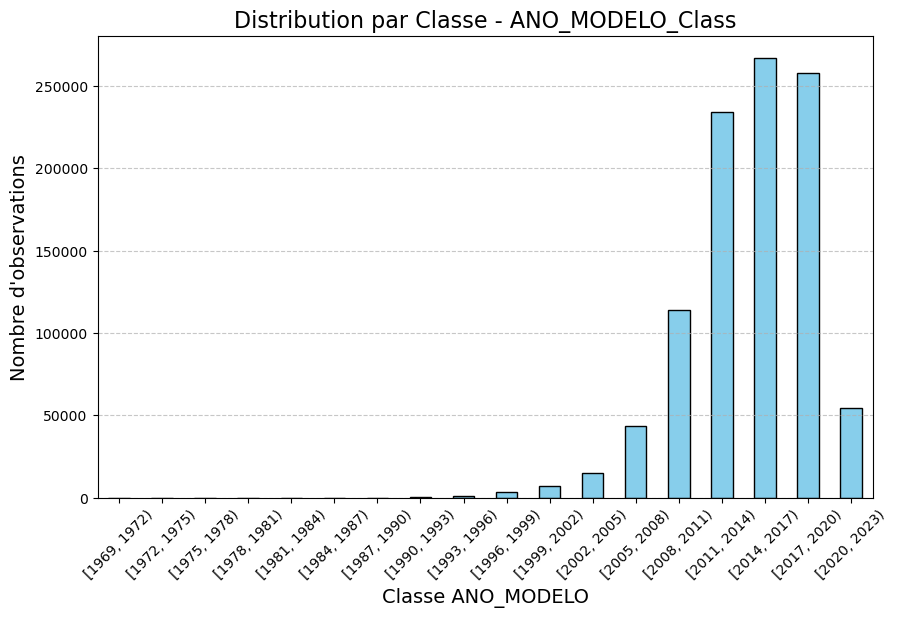

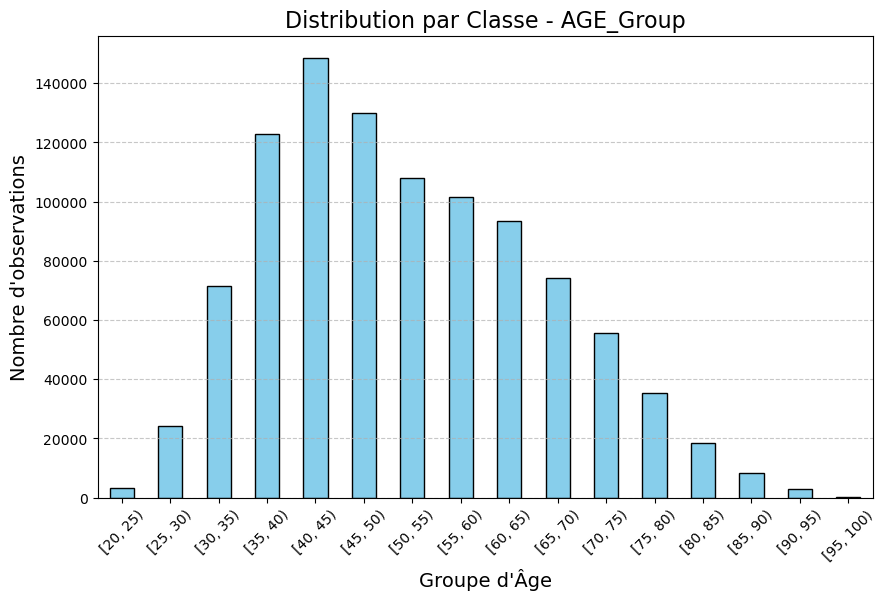

In [18]:
import matplotlib.pyplot as plt

# Vérification des colonnes nécessaires
if 'ANO_MODELO_Class' in df.columns and 'AGE_Group' in df.columns:
    # Histogramme pour ANO_MODELO_Class
    plt.figure(figsize=(10, 6))
    df['ANO_MODELO_Class'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title("Distribution par Classe - ANO_MODELO_Class", fontsize=16)
    plt.xlabel("Classe ANO_MODELO", fontsize=14)
    plt.ylabel("Nombre d'observations", fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # Histogramme pour AGE_Group
    plt.figure(figsize=(10, 6))
    df['AGE_Group'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title("Distribution par Classe - AGE_Group", fontsize=16)
    plt.xlabel("Groupe d'Âge", fontsize=14)
    plt.ylabel("Nombre d'observations", fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("Les colonnes 'ANO_MODELO_Class' et/ou 'AGE_Group' ne sont pas disponibles dans le DataFrame.")


/var/folders/f0/ldt2nc1x365dskh_5mcd96s80000gn/T/ipykernel_26827/1536736969.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='AGE_Group', y='number_of_claims', showfliers=False, palette="Blues")


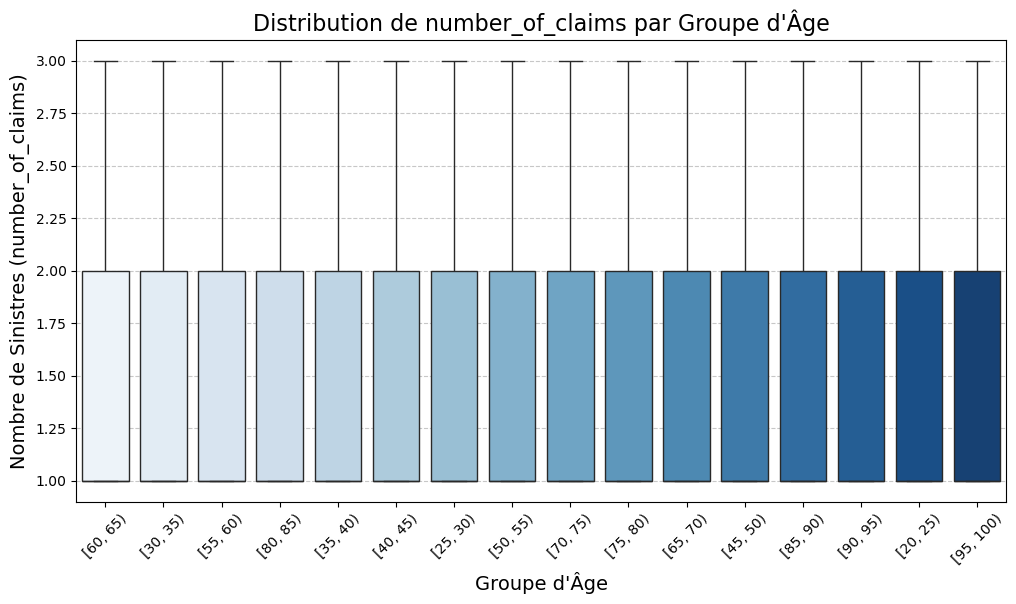

/var/folders/f0/ldt2nc1x365dskh_5mcd96s80000gn/T/ipykernel_26827/1536736969.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='ANO_MODELO_Class', y='number_of_claims', showfliers=False, palette="Blues")


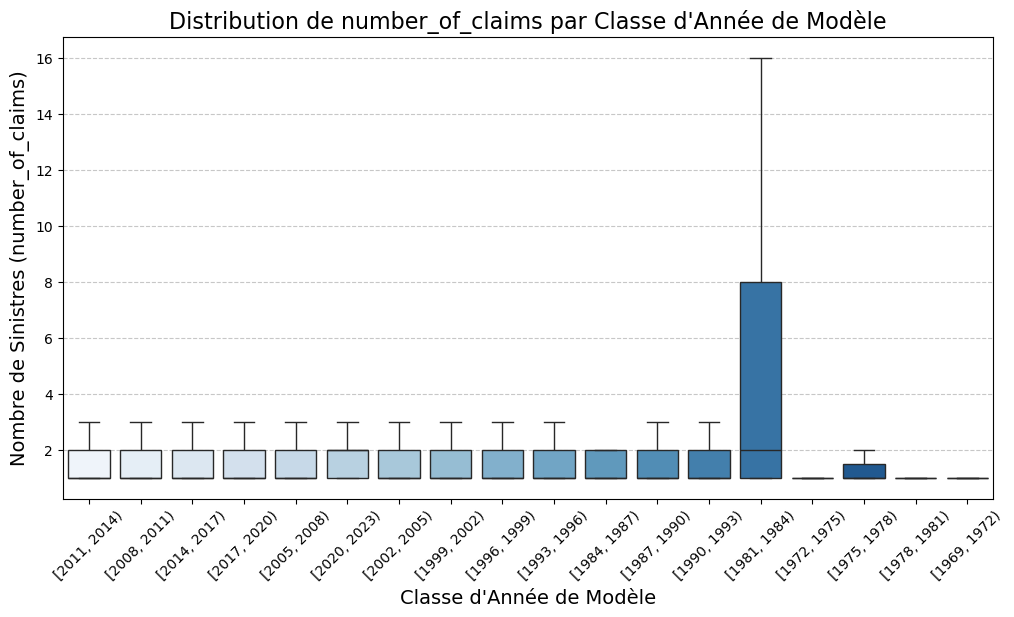

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Vérification des colonnes nécessaires
if 'AGE_Group' in df.columns and 'ANO_MODELO_Class' in df.columns and 'number_of_claims' in df.columns:
    # Boxplot pour AGE_Group
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='AGE_Group', y='number_of_claims', showfliers=False, palette="Blues")
    plt.title("Distribution de number_of_claims par Groupe d'Âge", fontsize=16)
    plt.xlabel("Groupe d'Âge", fontsize=14)
    plt.ylabel("Nombre de Sinistres (number_of_claims)", fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # Boxplot pour ANO_MODELO_Class
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='ANO_MODELO_Class', y='number_of_claims', showfliers=False, palette="Blues")
    plt.title("Distribution de number_of_claims par Classe d'Année de Modèle", fontsize=16)
    plt.xlabel("Classe d'Année de Modèle", fontsize=14)
    plt.ylabel("Nombre de Sinistres (number_of_claims)", fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("Les colonnes 'AGE_Group', 'ANO_MODELO_Class' et/ou 'number_of_claims' ne sont pas disponibles dans le DataFrame.")


In [20]:
df.dtypes

number_of_claims     int64
COD_MODELO_x        object
COD_TARIF_x         object
REGIAO_x            object
IS_CASCO            object
IS_RCDMAT           object
IS_RCDC             object
IS_RCDMOR           object
SEXO_x              object
TEMPO_HAB           object
UTILIZACAO          object
AGE_Group           object
ANO_MODELO_Class    object
dtype: object

In [21]:
from sklearn.model_selection import train_test_split

# Définir la variable cible et les variables explicatives
target = 'number_of_claims'  # La variable cible est 'number_of_claims'
features = df.drop(columns=[target])  # Toutes les colonnes sauf la cible

# Identifier les colonnes numériques et catégoriques
num_cols = features.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = features.select_dtypes(include=['object', 'category']).columns.tolist()

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    features, 
    df[target], 
    test_size=0.2, 
    random_state=42
)

# Afficher les informations clés
print("Colonnes numériques :", num_cols)
print("Colonnes catégoriques :", cat_cols)
print(f"Nombre d'observations dans l'ensemble d'entraînement : {X_train.shape[0]}")
print(f"Nombre d'observations dans l'ensemble de test : {X_test.shape[0]}")


Colonnes numériques : []
Colonnes catégoriques : ['COD_MODELO_x', 'COD_TARIF_x', 'REGIAO_x', 'IS_CASCO', 'IS_RCDMAT', 'IS_RCDC', 'IS_RCDMOR', 'SEXO_x', 'TEMPO_HAB', 'UTILIZACAO', 'AGE_Group', 'ANO_MODELO_Class']
Nombre d'observations dans l'ensemble d'entraînement : 798720
Nombre d'observations dans l'ensemble de test : 199680


learning curves : Random Forest

Scores MSE négatifs par pli : [-4.37813716 -4.28205633 -4.25824436 -4.43049537 -4.24570766]
MSE moyen : 4.3189281760741
MAE : 1.12
RMSE : 2.09
R² : 0.06
MSE : 4.38
Déviance : 1750527.05
AIC : 468368.89


/Users/pauldakpogan/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


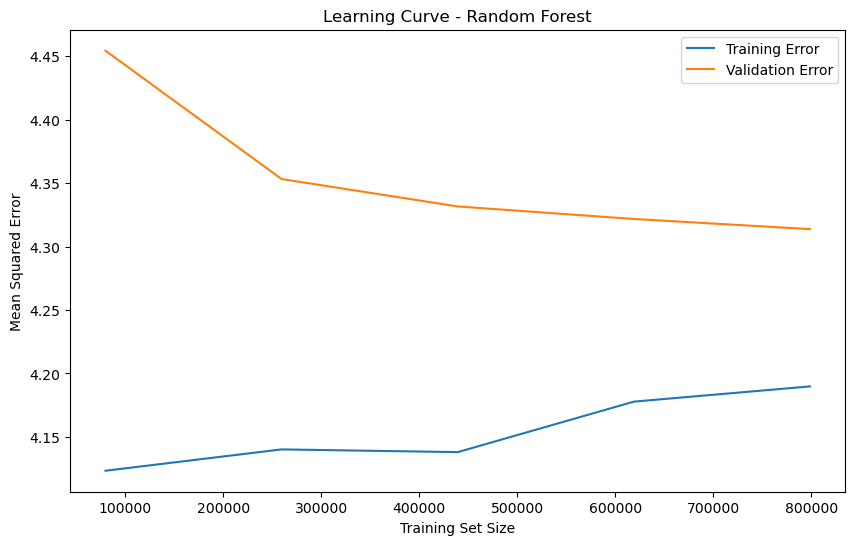

In [22]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, learning_curve
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Définir la variable cible et les variables explicatives
target = 'number_of_claims'
features = df.drop(columns=[target])

# Identifier les colonnes numériques et catégoriques
num_cols = features.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = features.select_dtypes(include=['object', 'category']).columns.tolist()

# Pipeline pour les colonnes numériques
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Pipeline pour les colonnes catégoriques
cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine les transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ]
)

# Pipeline complet avec Random Forest
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=10, max_depth=10, n_jobs=-1, random_state=42))
])

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(features, df[target], test_size=0.2, random_state=42)

# Validation croisée (K-Fold)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model_pipeline, features, df[target], cv=kf, scoring='neg_mean_squared_error')

# Afficher les résultats de la validation croisée
print("Scores MSE négatifs par pli :", cv_scores)
print("MSE moyen :", -cv_scores.mean())

# Ajuster le modèle sur l'ensemble d'entraînement
model_pipeline.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model_pipeline.predict(X_test)

# Calculer les métriques
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Approximation de la déviance et de l'AIC
deviance = 2 * mse * len(y_test)
n_params = len(model_pipeline.named_steps['model'].feature_importances_)
aic = len(y_test) * np.log(mse) + 2 * n_params

# Afficher les métriques
print(f"MAE : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R² : {r2:.2f}")
print(f"MSE : {mse:.2f}")
print(f"Déviance : {deviance:.2f}")
print(f"AIC : {aic:.2f}")

# Courbe d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(
    model_pipeline, features, df[target], cv=5, scoring='neg_mean_squared_error', n_jobs=-1
)

# Calculer les moyennes des erreurs d'entraînement et de validation
train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

# Tracer la courbe d'apprentissage
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Training Error")
plt.plot(train_sizes, test_scores_mean, label="Validation Error")
plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curve - Random Forest")
plt.legend()
plt.show()


# Importance des varibles : Random Forest

In [ ]:
df

,number_of_claims,COD_MODELO_x,ANO_MODELO_x,COD_TARIF_x,REGIAO_x,IS_CASCO,IS_RCDMAT,IS_RCDC,IS_RCDMOR,SEXO_x,AGE_x,TEMPO_HAB,UTILIZACAO
0,1,847,2012,6,1,34526.0,300000.0,300000.0,40000.0,2,62,463,2
1,2,1336,2013,6,8,34119.0,200000.0,200000.0,5000.0,2,33,129,2
2,1,2452,2010,6,23,29402.0,50000.0,50000.0,10000.0,1,59,0,2
3,2,1824,2016,6,1,39552.0,150000.0,100000.0,0.0,1,60,0,2
4,1,75,2009,15,12,43261.0,50000.0,50000.0,0.0,2,61,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
998996,1,1210,2005,6,11,16478.0,50000.0,50000.0,0.0,2,78,0,2
998997,1,1864,2019,6,13,66693.0,100000.0,100000.0,5000.0,2,39,0,1
998998,1,1109,2001,17,8,34167.0,100000.0,150000.0,0.0,2,65,0,2
998999,1,1843,2016,6,5,32723.0,100000.0,100000.0,10000.0,1,48,0,1


Les 10 caractéristiques les plus importantes :
                 Feature  Importance
86080           SEXO_x_0    0.430502
5399        IS_CASCO_0.0    0.068840
5335      COD_TARIF_x_21    0.040516
86604       UTILIZACAO_2    0.036355
85827        IS_RCDC_0.0    0.026847
5359         REGIAO_x_11    0.020874
5337      COD_TARIF_x_23    0.017899
86032  IS_RCDMOR_40000.0    0.009354
79677   IS_CASCO_85799.0    0.007426
84638   IS_CASCO_97289.0    0.006366


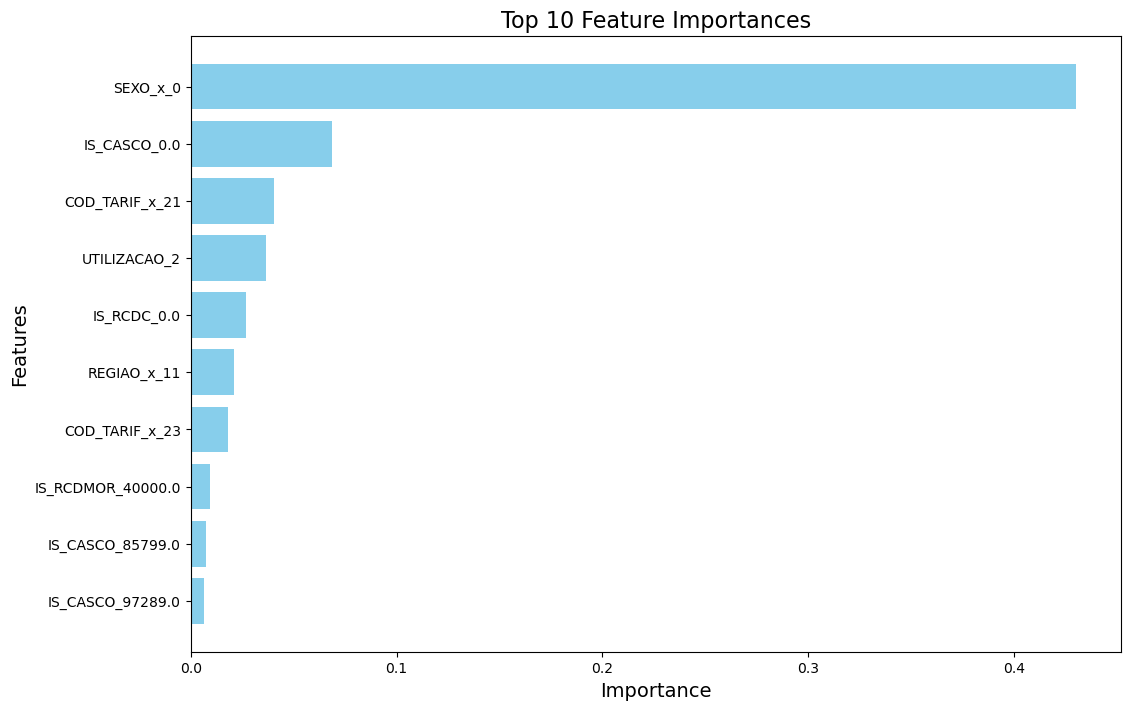

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# Définir la variable cible et les variables explicatives
target = 'number_of_claims'
features = df.drop(columns=[target])

# Identifier les colonnes numériques et catégoriques
num_cols = features.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = features.select_dtypes(include=['object', 'category']).columns.tolist()

# Pipeline pour les colonnes numériques
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Pipeline pour les colonnes catégoriques
cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine les transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ]
)

# Pipeline complet avec Random Forest
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=10, max_depth=10, random_state=42, n_jobs=-1))
])

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(features, df[target], test_size=0.2, random_state=42)

# Ajuster le pipeline sur les données d'entraînement
model_pipeline.fit(X_train, y_train)

# Récupérer les noms des colonnes transformées pour les catégoriques
encoded_features = model_pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(cat_cols)

# Obtenir les importances des caractéristiques
importances = model_pipeline.named_steps['model'].feature_importances_

# Vérifier si les dimensions correspondent
if len(encoded_features) == len(importances):
    # Créer un DataFrame des importances
    feature_importances = pd.DataFrame({
        'Feature': encoded_features,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    # Afficher les 10 caractéristiques les plus importantes
    print("Les 10 caractéristiques les plus importantes :")
    print(feature_importances.head(10))

    # Visualisation des importances
    plt.figure(figsize=(12, 8))
    plt.barh(feature_importances['Feature'][:10], feature_importances['Importance'][:10], color='skyblue')
    plt.title('Top 10 Feature Importances', fontsize=16)
    plt.xlabel('Importance', fontsize=14)
    plt.ylabel('Features', fontsize=14)
    plt.gca().invert_yaxis()
    plt.show()
else:
    print("Erreur : Les dimensions des colonnes transformées et des importances ne correspondent pas.")


Graphique SHAP : random Forest

In [ ]:
import shap
import pandas as pd

# Transformer les données de test avec le préprocesseur
X_test_transformed = model_pipeline.named_steps['preprocessor'].transform(X_test)

# Convertir en DataFrame avec les noms des colonnes transformées
X_sample_transformed = pd.DataFrame.sparse.from_spmatrix(
    X_test_transformed,
    columns=model_pipeline.named_steps['preprocessor'].get_feature_names_out()
)

# Créer un explainer SHAP pour le modèle
explainer = shap.Explainer(model_pipeline.named_steps['model'])

# Calculer les valeurs SHAP pour les données transformées
shap_values = explainer(X_sample_transformed)

# Afficher les noms des colonnes après transformation
feature_names = model_pipeline.named_steps['preprocessor'].get_feature_names_out()

# Créer un DataFrame pour mapper les valeurs SHAP avec les colonnes
X_sample_transformed_df = pd.DataFrame(X_sample_transformed, columns=feature_names)

# Visualisation globale : Résumé des importances des caractéristiques
shap.summary_plot(shap_values, X_sample_transformed)

# Visualisation locale : Analyse d'une prédiction spécifique

sample_index = 0  # Modifier pour choisir une observation spécifique
shap.force_plot(
    explainer.expected_value,
    shap_values[sample_index].values,
    X_sample_transformed.iloc[sample_index],
    matplotlib=True
)



# Importance des variables : XgBoost

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Function to load and clean data
def load_and_clean_data(file_path):
    try:
        df = pd.read_csv(file_path, sep=';', low_memory=False)
        print("Fichier chargé avec succès.")
    except Exception as e:
        print(f"Erreur lors du chargement du fichier : {e}")
        return None

    # Handle outliers
    threshold = df['number_of_claims'].quantile(0.995)
    df = df[df['number_of_claims'] <= threshold]
    print(f"Données filtrées pour exclure les valeurs aberrantes au-dessus du 99ᵉ centile ({threshold}).")

    # Drop unnecessary columns
    columns_to_drop = ['INICIO_VIG', 'D_OCORR']
    df.drop(columns=columns_to_drop, errors='ignore', inplace=True)

    # Encode categorical columns
    categorical_columns = ['COD_MODELO_x', 'COD_TARIF_x', 'SEXO_x']
    for col in categorical_columns:
        if col in df.columns:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col].astype(str))
            print(f"Colonne {col} encodée avec LabelEncoder.")

    return df

# Load and clean data
file_path = "/Users/pauldakpogan/Downloads/R_AUTO_2021A_transformed_filtered_sampled.csv"
df = load_and_clean_data(file_path)
if df is None:
    exit()

# Define variables
y = df['number_of_claims']
X = df.drop(columns=['number_of_claims'])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a simple XGBoost model
xgb_regressor = xgb.XGBRegressor(
    objective='reg:squarederror',
    learning_rate=0.1,
    max_depth=4,
    n_estimators=200,
    subsample=0.8,
    colsample_bytree=0.8,
    seed=42
)

# Train the model
xgb_regressor.fit(X_train, y_train)

# Predict and add a column to the DataFrame
df['predicted_claims'] = xgb_regressor.predict(X)

# Save the DataFrame with predictions
output_file_path = "/Users/pauldakpogan/Downloads/R_AUTO_2021A_with_predictions.csv"
df.to_csv(output_file_path, sep=';', index=False)
print(f"Fichier avec les prédictions sauvegardé dans : {output_file_path}")

# Evaluate the model
y_pred = xgb_regressor.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMAE : {mae:.4f}")
print(f"MSE : {mse:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R² : {r2:.4f}")

# Feature importance
importance = xgb_regressor.get_booster().get_score(importance_type='weight')
importance_df = pd.DataFrame({'Feature': importance.keys(), 'Importance': importance.values()})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("\nImportance des caractéristiques :")
print(importance_df)


SHAP version: 0.46.0


# Learning Curves : Xgboost

In [ ]:

import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Charger les données
file_path = "/Users/pauldakpogan/Downloads/R_AUTO_2021A_with_predictions.csv"
df = pd.read_csv(file_path, sep=';', low_memory=False)
print("Données chargées avec succès.")

# Définir les colonnes cibles et explicatives
target_column = 'predicted_claims'  # Colonne cible
feature_columns = ['COD_MODELO_x', 'ANO_MODELO_x', 'COD_TARIF_x', 'REGIAO_x',
                   'IS_CASCO', 'IS_RCDMAT', 'IS_RCDC', 'IS_RCDMOR', 'SEXO_x',
                   'AGE_x', 'TEMPO_HAB', 'UTILIZACAO']  # Colonnes explicatives

# Diviser les données
X = df[feature_columns]
y = df[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialiser les structures pour le Learning Curve
train_sizes = np.linspace(0.1, 1.0, 10)  # Fraction de données utilisées
train_errors = []
validation_errors = []

# Calcul des erreurs pour différentes tailles de données d'entraînement
for train_size in train_sizes:
    X_train_sample = X_train[:int(len(X_train) * train_size)]
    y_train_sample = y_train[:int(len(y_train) * train_size)]
    
    # Entraîner un modèle sur l'échantillon réduit
    model = xgb.XGBRegressor(
        objective='reg:squarederror',
        learning_rate=0.1,
        max_depth=4,
        n_estimators=100,
        subsample=0.8,
        colsample_bytree=0.8,
        seed=42
    )
    model.fit(X_train_sample, y_train_sample)
    
    # Calculer les erreurs
    y_train_pred = model.predict(X_train_sample)
    y_test_pred = model.predict(X_test)
    
    train_errors.append(mean_squared_error(y_train_sample, y_train_pred))
    validation_errors.append(mean_squared_error(y_test, y_test_pred))

# Générer le graphique
plt.figure(figsize=(10, 6))
plt.plot(train_sizes * len(X_train), train_errors, label="Training Error", marker='o', color='blue')
plt.plot(train_sizes * len(X_train), validation_errors, label="Validation Error", marker='s', color='orange')
plt.title("Learning Curve - XGBoost")
plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.grid(True)
plt.savefig('/Users/pauldakpogan/Downloads/learning_curve_xgboost.png')
plt.show()

print("Learning Curve générée et enregistrée sous '/Users/pauldakpogan/Downloads/learning_curve_xgboost.png'")



# Graphique SHP : XgBoost

In [ ]:

import pandas as pd
import shap
import xgboost as xgb
import matplotlib.pyplot as plt

# Charger les données
file_path = "/Users/pauldakpogan/Downloads/R_AUTO_2021A_with_predictions.csv"
df = pd.read_csv(file_path, sep=';', low_memory=False)
print("Données chargées avec succès.")

# Définir les colonnes cibles et explicatives
target_column = 'predicted_claims'  # Colonne cible
feature_columns = ['COD_MODELO_x', 'ANO_MODELO_x', 'COD_TARIF_x', 'REGIAO_x', 
                   'IS_CASCO', 'IS_RCDMAT', 'IS_RCDC', 'IS_RCDMOR', 'SEXO_x', 
                   'AGE_x', 'TEMPO_HAB', 'UTILIZACAO']  # Colonnes explicatives

# Vérifier la présence des colonnes nécessaires
missing_columns = [col for col in feature_columns + [target_column] if col not in df.columns]
if missing_columns:
    raise ValueError(f"Les colonnes suivantes sont absentes du fichier : {missing_columns}")

# Charger les données pour le modèle
X = df[feature_columns]
y = df[target_column]

# Entraîner un modèle XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', learning_rate=0.1, max_depth=4, n_estimators=100, seed=42)
xgb_model.fit(X, y)

# Calculer les valeurs SHAP
explainer = shap.Explainer(xgb_model, X)
shap_values = explainer(X)

# Générer les graphiques SHAP

# Graphique de résumé SHAP (barres)
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X, plot_type="bar", show=False)
plt.title("SHAP Summary Plot (Bar Chart)")
plt.savefig('/Users/pauldakpogan/Downloads/shap_summary_bar_updated.png')
print("Graphique de résumé SHAP (barres) enregistré.")

# Graphique détaillé SHAP (violin plot)
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X, show=False)
plt.title("SHAP Summary Plot (Violin Plot)")
plt.savefig('/Users/pauldakpogan/Downloads/shap_summary_violin_updated.png')
print("Graphique détaillé SHAP (violin plot) enregistré.")

print("Graphiques générés et enregistrés dans le dossier '/Users/pauldakpogan/Downloads/'.")



## Graphe de dépendnace : Pour le XgBoost

In [ ]:

import pandas as pd
import xgboost as xgb
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Chemin vers le fichier de données
file_path = "/Users/pauldakpogan/Downloads/R_AUTO_2021A_with_predictions.csv"

# Charger les données
df = pd.read_csv(file_path, sep=';', low_memory=False)
print("Données chargées avec succès.")

# Définir les colonnes cibles et explicatives
target_column = 'predicted_claims'
feature_columns = ['AGE_x', 'COD_TARIF_x', 'REGIAO_x', 'SEXO_x']

# Vérifier si toutes les colonnes nécessaires sont présentes
missing_columns = [col for col in feature_columns + [target_column] if col not in df.columns]
if missing_columns:
    raise ValueError(f"Les colonnes suivantes sont absentes du fichier : {missing_columns}")

# Préparer les données
X = df[feature_columns]
y = df[target_column]

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner le modèle XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', learning_rate=0.1, max_depth=4, n_estimators=100)
xgb_model.fit(X_train, y_train)

# Graphiques de dépendance partielle
for feature in feature_columns:
    plt.figure(figsize=(8, 6))
    PartialDependenceDisplay.from_estimator(xgb_model, X, [feature], kind='average', grid_resolution=50)
    plt.title(f"Dépendance partielle pour {feature}")
    plt.savefig(f'/Users/pauldakpogan/Downloads/partial_dependence_{feature}.png')
    plt.show()

print("Graphiques de dépendance partielle générés et sauvegardés.")








import pandas as pd
import xgboost as xgb
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Chemin vers le fichier de données
file_path = "/Users/pauldakpogan/Downloads/R_AUTO_2021A_with_predictions.csv"

# Charger les données
df = pd.read_csv(file_path, sep=';', low_memory=False)
print("Données chargées avec succès.")

# Définir les colonnes cibles et explicatives
target_column = 'predicted_claims'
feature_columns = ['AGE_x', 'COD_TARIF_x', 'REGIAO_x', 'SEXO_x']

# Vérifier si toutes les colonnes nécessaires sont présentes
missing_columns = [col for col in feature_columns + [target_column] if col not in df.columns]
if missing_columns:
    raise ValueError(f"Les colonnes suivantes sont absentes du fichier : {missing_columns}")

# Préparer les données
X = df[feature_columns]
y = df[target_column]

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner le modèle XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', learning_rate=0.1, max_depth=4, n_estimators=100)
xgb_model.fit(X_train, y_train)

# Graphiques de dépendance partielle pour chaque variable
for feature in feature_columns:
    plt.figure(figsize=(8, 6))
    PartialDependenceDisplay.from_estimator(xgb_model, X, [feature], kind='average', grid_resolution=50)
    plt.title(f"Dépendance partielle pour {feature}")
    plt.savefig(f'/Users/pauldakpogan/Downloads/partial_dependence_{feature}.png')
    plt.show()

print("Graphiques de dépendance partielle générés et sauvegardés.")


# Code GLM Poisson : Frequence

In [ ]:



####
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
import statsmodels.api as sm
import scipy.stats as stats

# Fonction pour charger et nettoyer les données
def load_and_clean_data(file_path):
    try:
        df = pd.read_csv(file_path, sep=';', low_memory=False)
        print("Fichier chargé avec succès.")
    except Exception as e:
        print(f"Erreur lors du chargement du fichier : {e}")
        return None

    # Nettoyage des noms de colonnes
    df.columns = df.columns.str.strip()

    # Suppression des colonnes inutiles
    df.drop(columns=['INICIO_VIG', 'D_OCORR'], errors='ignore', inplace=True)

    # Encodage des colonnes catégoriques
    categorical_columns = ['IS_RCDMOR', 'IS_RCDC', 'ANO_MODELO_x', 'IS_RCDMAT', 
                           'COD_TARIF_x', 'AGE_x', 'UTILIZACAO', 'COD_MODELO_x', 'REGIAO_x']
    for col in categorical_columns:
        if col in df.columns:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col].astype(str))
            print(f"Colonne {col} encodée avec LabelEncoder.")
        else:
            print(f"Attention : La colonne '{col}' est manquante dans le DataFrame.")

    return df

# Chemin du fichier
file_path = "/Users/pauldakpogan/Downloads/R_AUTO_2021A_transformed_filtered_sampled.csv"

# Chargement et nettoyage des données
df = load_and_clean_data(file_path)
if df is None:
    exit()

# Définir la variable cible et les prédicteurs
y_column = 'number_of_claims'
predictor_columns = ['IS_RCDMOR', 'IS_RCDC', 'ANO_MODELO_x', 'IS_RCDMAT', 
                     'COD_TARIF_x', 'AGE_x', 'UTILIZACAO', 'COD_MODELO_x', 'REGIAO_x']

# Tests de déviance pour différents quantiles
quantiles = [0.99, 0.995, 0.999]
deviance_results = []

for q in quantiles:
    # Filtrer les données au-dessus du quantile
    threshold = df[y_column].quantile(q)
    df_filtered = df[df[y_column] <= threshold]
    print(f"\nDonnées filtrées au-dessus du quantile {q*100:.1f}% ({threshold} inclus).")

    # Variables dépendante et explicatives
    y = df_filtered[y_column]
    X = sm.add_constant(df_filtered[predictor_columns])

    # Ajustement du modèle
    try:
        model = sm.GLM(y, X, family=sm.families.Poisson()).fit()
        deviance_observed = model.deviance
        df_residuals = model.df_resid

        # Prédictions
        y_pred = model.predict(X)

        # Calcul des métriques
        mae = mean_absolute_error(y, y_pred)
        mse = mean_squared_error(y, y_pred)
        rmse = np.sqrt(mse)

        # Test de chi²
        critical_value = stats.chi2.ppf(0.95, df_residuals)
        p_value = stats.chi2.sf(deviance_observed, df_residuals)
        exceeds_critical = deviance_observed > critical_value

        # Stocker les résultats
        deviance_results.append({
            'Quantile': q,
            'Threshold': threshold,
            'Deviance': deviance_observed,
            'Degrees of Freedom': df_residuals,
            'Critical Value (95%)': critical_value,
            'P-Value': p_value,
            'Exceeds Critical Value': exceeds_critical,
            'MAE': mae,
            'MSE': mse,
            'RMSE': rmse
        })

    except Exception as e:
        print(f"Erreur lors de l'ajustement du modèle pour le quantile {q}: {e}")
        deviance_results.append({
            'Quantile': q,
            'Threshold': threshold,
            'Deviance': None,
            'Degrees of Freedom': None,
            'Critical Value (95%)': None,
            'P-Value': None,
            'Exceeds Critical Value': None,
            'MAE': None,
            'MSE': None,
            'RMSE': None
        })

# Convertir les résultats en DataFrame
deviance_df = pd.DataFrame(deviance_results)

# Afficher les résultats dans la console
print("\nRésumé des tests de déviance par quantile :")
print(deviance_df)

# Enregistrer les résultats dans un fichier CSV
output_file_path = "/Users/pauldakpogan/Documents/deviance_metrics_by_quantile.csv"
deviance_df.to_csv(output_file_path, index=False)
print(f"Résultats enregistrés dans : {output_file_path}")

